In [1]:
import sys
import time
import pandas as pd

sys.path.append('../')
import lib.functions as f
import trace_analysis
import plots_analysis
import trace_statistics
import trace_classification
import warnings
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
import sklearn.metrics as sm
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


warnings.filterwarnings('ignore')

Extracting data from the Log files and import into data


In [2]:
directory="../cooja3-9nodes/"
df = pd.read_csv(directory + "/traces/traces.csv", sep=',', encoding='utf-8')
data=f.import_Cooja2(df,directory)


In [3]:
df

,Unnamed: 0,directory,case,case_accuracy,case_accuracy2
0,0,traces/1bh-6,grid9_1bh-6_2019-02-13_19:15_,BH,BH
1,1,traces/1bh-6,grid9_1bh-6_2019-02-13_12:59_,BH,BH
2,2,traces/normal,grid9_normal_2019-02-13_18:51_,normal,normal
3,3,traces/normal,grid9_normal_2019-02-13_22:23_,normal,normal
4,4,traces/normal,grid9_normal_2019-02-13_17:05_,normal,normal
5,5,traces/1bh-7,grid9_1bh-7_2019-02-13_20:02_,BH,BH
6,6,traces/1bh-7,grid9_1bh-7_2019-02-13_15:08_,BH,BH
7,7,traces/rnd-1,rnd_1gh-2_2019-02-16_08:37_,BH,GH
8,8,traces/rnd-1,rnd_1bh-2_2019-02-14_15:38_,BH,BH
9,9,traces/rnd-1,rnd_1bh-7_2019-02-14_13:57_,BH,BH


In [13]:
data[0][0].pkts.head()

,seq,rtt
0,1,233
1,2,277
2,7,304
3,16,227
4,18,204


Statistic generation for every node for every network for every case

In [125]:
#create_stats(directory, df, pings, window)
"""
 df = pd.read_csv(directory + "/traces/traces.csv", sep=',', encoding='utf-8')

    win_25_stats = create_stats(directory, df, pings=100, window=25)
    win_50_stats = create_stats(directory, df, pings=100, window=50)
    win_100_stats = create_stats(directory, df, pings=100, window=100)
    win_200_stats = create_stats(directory, df, pings=200, window=200)

    stats=pd.DataFrame()
    stats=pd.concat([
        win_25_stats,
        win_50_stats,
        win_100_stats,
        win_200_stats,
    ], ignore_index=True)
    stats.to_csv(directory+"stats_per_node.csv", sep=',', encoding='utf-8')



"""

stats = pd.read_csv(directory + "/stats_per_node.csv", sep=',', encoding='utf-8')
stats.head()

,Unnamed: 0,experiment,node_id,label,label_2,loss,count,std,mean,var,hop,min,max,outliers,window
0,0,grid9_1bh-6_2019-02-13_19:15_,aaaa::212:7408:8:808,Attacked,BH,72.0,7,81.001470,268.714286,6561.238095,4,154.0,476.0,1,25
1,1,grid9_1bh-6_2019-02-13_19:15_,aaaa::212:7408:8:808,Attacked,BH,24.0,19,53.118592,267.157895,2821.584795,4,154.0,476.0,2,25
2,2,grid9_1bh-6_2019-02-13_19:15_,aaaa::212:7408:8:808,Attacked,BH,24.0,19,51.784247,257.947368,2681.608187,4,154.0,476.0,0,25
3,3,grid9_1bh-6_2019-02-13_19:15_,aaaa::212:7408:8:808,Attacked,BH,4.0,24,56.217599,224.375000,3160.418478,4,154.0,476.0,1,25
4,4,grid9_1bh-6_2019-02-13_19:15_,aaaa::212:7404:4:404,Attacked,BH,4.0,24,74.238789,112.470833,5511.397808,2,59.4,392.0,2,25


Kmeans results

In [149]:
directory="../cooja3-9nodes/"
df = pd.read_csv(directory + "stats_per_node.csv", sep=',', encoding='utf-8').drop(columns="Unnamed: 0")
    
win_25_stats = df[df["window"] == 25]
win_50_stats = df[df["window"] == 50]
win_100_stats= df[df["window"] == 100]
win_200_stats = df[df["window"] == 200]
trace_stats = {
        25: win_25_stats.drop(columns=["label_2"]),
        50: win_50_stats.drop(columns=["label_2"]),
        100: win_100_stats.drop(columns=["label_2"]),
        200: win_200_stats.drop(columns=["label_2"]),
    }
features_to_drop = [
        'node_id', 'experiment', 'label', "window",
        "mean",
        #'loss',
        'count',
        'outliers',
        "std",
        #"var",
        "hop",
         #"min",
        "max"
    ]

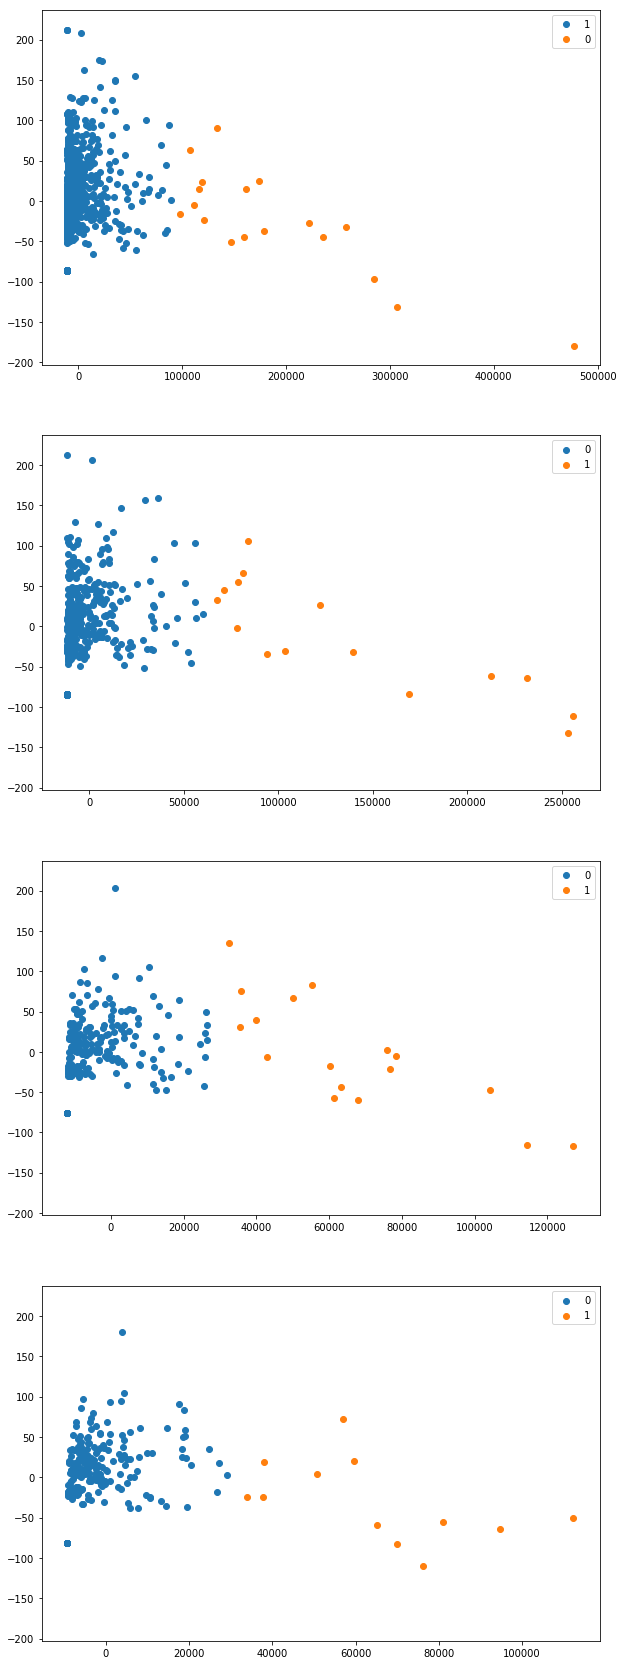

In [151]:
figsize= figsize=(10,30)
fig, axs= plt.subplots(len(trace_stats),1, figsize=figsize,sharey=True, )
count=-1
for trace_size in trace_stats:
    count+=1
   
    trace = trace_stats[trace_size]
    
    target = trace["label"].values
    
    correction = []
    for i in range(len(target)):
        if (i == "Normal"):
            correction.append(0)
        else:
            correction.append(1)
    #dropping features
    features = trace.drop(columns=features_to_drop)
    kmeans = KMeans(n_clusters=2)
    kmeans.fit(features)
    labels = kmeans.predict(features)
    
    #labels = f.accuracy_score_corrected(correction, labels)
    
    trace["KmeansLabels"]=labels   
    centroids = kmeans.cluster_centers_
    #print(trace)
    #print(centroids)
    #End of algorithm
    #Try to draw them
    X=features
    pca = PCA(n_components=2)
    pca.fit(X)
    X_ = pca.transform(X)
    dfPCA = pd.DataFrame({'x1': X_[:,0], 'x2': X_[:,1]})
    dfPCA["labels"]=labels
    labels = trace['KmeansLabels'].unique().tolist()
    #plt.figure(figsize=(7,5))
    
   
    
    for lab in labels:
        #print(lab)
        
        #print(dfPCA[dfPCA['labels'] == lab])
        axs[count].scatter(dfPCA.loc[dfPCA['labels'] == lab, 'x1'],  dfPCA.loc[dfPCA['labels'] == lab, 'x2'], label=lab)
        axs[count].legend()
    

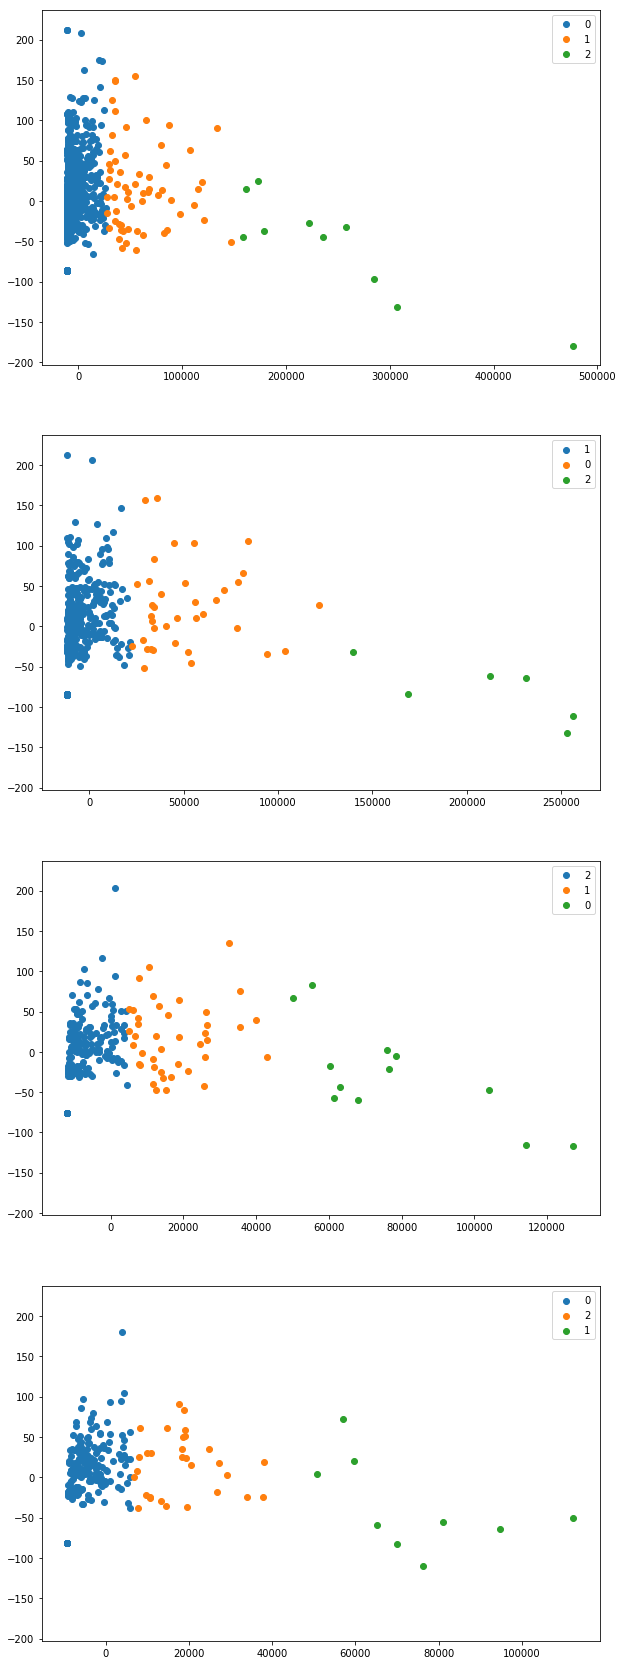

In [152]:
figsize= figsize=(10,30)
fig, axs= plt.subplots(len(trace_stats),1, figsize=figsize,sharey=True, )
count=-1
for trace_size in trace_stats:
    count+=1
   
    trace = trace_stats[trace_size]
    
    target = trace["label"].values
    
    correction = []
    for i in range(len(target)):
        if (i == "Normal"):
            correction.append(0)
        else:
            correction.append(1)
    #dropping features
    features = trace.drop(columns=features_to_drop)
    kmeans = KMeans(n_clusters=3)
    kmeans.fit(features)
    labels = kmeans.predict(features)
    
    #labels = f.accuracy_score_corrected(correction, labels)
    
    trace["KmeansLabels"]=labels   
    centroids = kmeans.cluster_centers_
    #print(trace)
    #print(centroids)
    #End of algorithm
    #Try to draw them
    X=features
    pca = PCA(n_components=2)
    pca.fit(X)
    X_ = pca.transform(X)
    dfPCA = pd.DataFrame({'x1': X_[:,0], 'x2': X_[:,1]})
    dfPCA["labels"]=labels
    labels = trace['KmeansLabels'].unique().tolist()
    #plt.figure(figsize=(7,5))
    for lab in labels:
        #print(lab)
        
        #print(dfPCA[dfPCA['labels'] == lab])
        axs[count].scatter(dfPCA.loc[dfPCA['labels'] == lab, 'x1'],  dfPCA.loc[dfPCA['labels'] == lab, 'x2'], label=lab)
        axs[count].legend()
    

In [4]:

directory="../cooja3-16nodes/"
results_2_classes_node_16_nodes,results_2_classes_network_16_nodes,results_3_classes_node_16_nodes,results_3_classes_network_16_nodes=f.run_all(directory)
directory="../cooja3-9nodes/"
results_2_classes_node_9_nodes,results_2_classes_network_9_nodes,results_3_classes_node_9_nodes,results_3_classes_network_9_nodes=f.run_all(directory)


In [19]:
directory="../cooja4-9nodes/"
df = pd.read_csv(directory + "/traces/traces.csv", sep=',', encoding='utf-8')

df

,directory,case,case_accuracy,case_accuracy2
0,traces/normal,rnd__2019-05-01_13:41_,normal,normal
1,traces/normal,normal__2019-05-01_13:43_,normal,normal
2,traces/normal,rnd__2019-05-01_01:07_,normal,normal
3,traces/normal,normal_2019-05-03_12:55_,normal,normal
4,traces/normal,normal_2019-05-03_12:56_,normal,normal
5,traces/1bh-5,1bh-5_2019-05-03_00:32_,abnormal,BH
6,traces/1bh-5,1bh-5_2019-05-03_00:48_,abnormal,BH


In [21]:
df = pd.read_csv(directory + "/traces/traces.csv", sep=',', encoding='utf-8')

win_25_stats = f.create_stats(directory, df, pings=100, window=25)
win_50_stats = f.create_stats(directory, df, pings=100, window=50)
win_100_stats = f.create_stats(directory, df, pings=100, window=100)
win_200_stats = f.create_stats(directory, df, pings=200, window=200)

stats=pd.DataFrame()
stats=pd.concat([
    win_25_stats,
    win_50_stats,
    win_100_stats,
    win_200_stats,
], ignore_index=True)
stats.to_csv(directory+"stats_per_node.csv", sep=',', encoding='utf-8')


Processing...
Processing...
Processing...
Processing...


In [23]:
directory="../cooja4-9nodes/"
df = pd.read_csv(directory + "stats_per_node.csv", sep=',', encoding='utf-8').drop(columns="Unnamed: 0")
    
win_25_stats = df[df["window"] == 25]
win_50_stats = df[df["window"] == 50]
win_100_stats= df[df["window"] == 100]
win_200_stats = df[df["window"] == 200]
trace_stats = {
        25: win_25_stats.drop(columns=["label_2"]),
        50: win_50_stats.drop(columns=["label_2"]),
        100: win_100_stats.drop(columns=["label_2"]),
        200: win_200_stats.drop(columns=["label_2"]),
    }
features_to_drop = [
        'node_id', 'experiment', 'label', "window",
        "mean",
        #'loss',
        'count',
        'outliers',
        "std",
        #"var",
        "hop",
         #"min",
        "max"
    ]

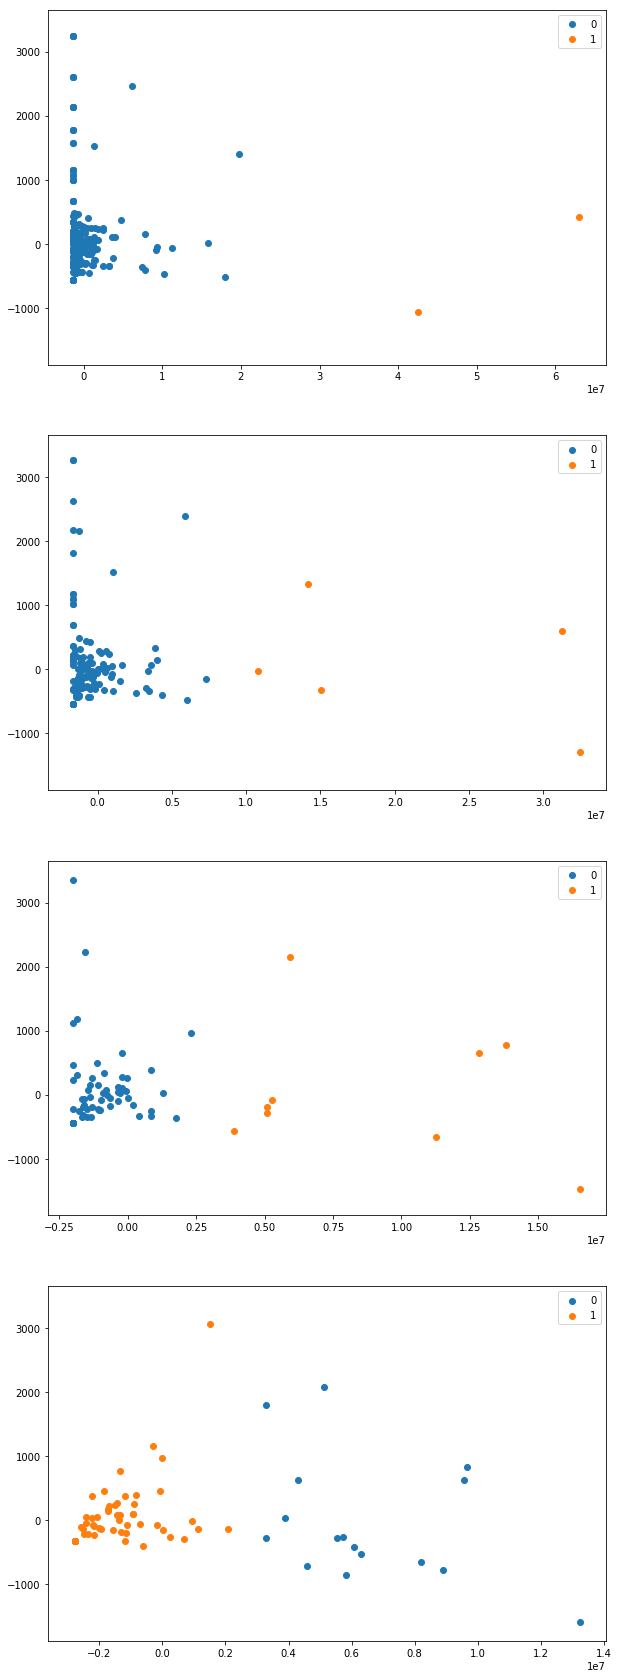

In [26]:
figsize= figsize=(10,30)
fig, axs= plt.subplots(len(trace_stats),1, figsize=figsize,sharey=True, )
count=-1
for trace_size in trace_stats:
    count+=1
   
    trace = trace_stats[trace_size]
    
    target = trace["label"].values
    
    correction = []
    for i in range(len(target)):
        if (i == "Normal"):
            correction.append(0)
        else:
            correction.append(1)
    #dropping features
    features = trace.drop(columns=features_to_drop)
    kmeans = KMeans(n_clusters=2)
    kmeans.fit(features)
    labels = kmeans.predict(features)
    
    #labels = f.accuracy_score_corrected(correction, labels)
    
    trace["KmeansLabels"]=labels   
    centroids = kmeans.cluster_centers_
    #print(trace)
    #print(centroids)
    #End of algorithm
    #Try to draw them
    X=features
    pca = PCA(n_components=2)
    pca.fit(X)
    X_ = pca.transform(X)
    dfPCA = pd.DataFrame({'x1': X_[:,0], 'x2': X_[:,1]})
    dfPCA["labels"]=labels
    labels = trace['KmeansLabels'].unique().tolist()
    #plt.figure(figsize=(7,5))
    
   
    
    for lab in labels:
        #print(lab)
        
        #print(dfPCA[dfPCA['labels'] == lab])
        axs[count].scatter(dfPCA.loc[dfPCA['labels'] == lab, 'x1'],  dfPCA.loc[dfPCA['labels'] == lab, 'x2'], label=lab)
        axs[count].legend()
    trace.to_csv(directory + "results_"+str(trace_size)+".csv", sep=',', encoding='utf-8')